In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path=Path("../input/intel-image-classification")
tfms = get_transforms(do_flip=False)

In [4]:
data = ImageDataBunch.from_folder(path, train='seg_train', valid='seg_test',ds_tfms=tfms, size=224).normalize(imagenet_stats)

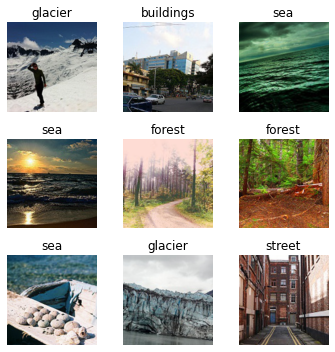

In [5]:
data.show_batch(rows = 3,figsize=(5,5))

In [6]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
14034
3000


Use pretrained resnet34

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [9]:
learn.model_dir ="/tmp/model/"


Find the optimum learning rate.

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


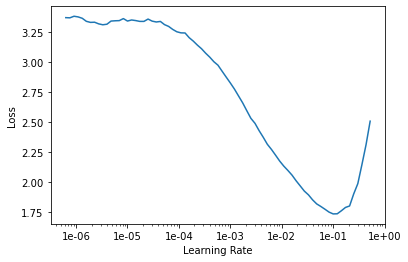

In [11]:
learn.recorder.plot()

Use lr of 3e-3 default lr of fit_one_cycle is the same. Rest defaults here: https://docs.fast.ai/train.html#fit_one_cycle 

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.499080,0.335504,0.115667,02:10
1,0.322316,0.258963,0.091000,02:02
2,0.265681,0.211223,0.080667,01:56
3,0.211285,0.204233,0.076333,02:00


"learn" is now our trained model and now lets see how well we have done.

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

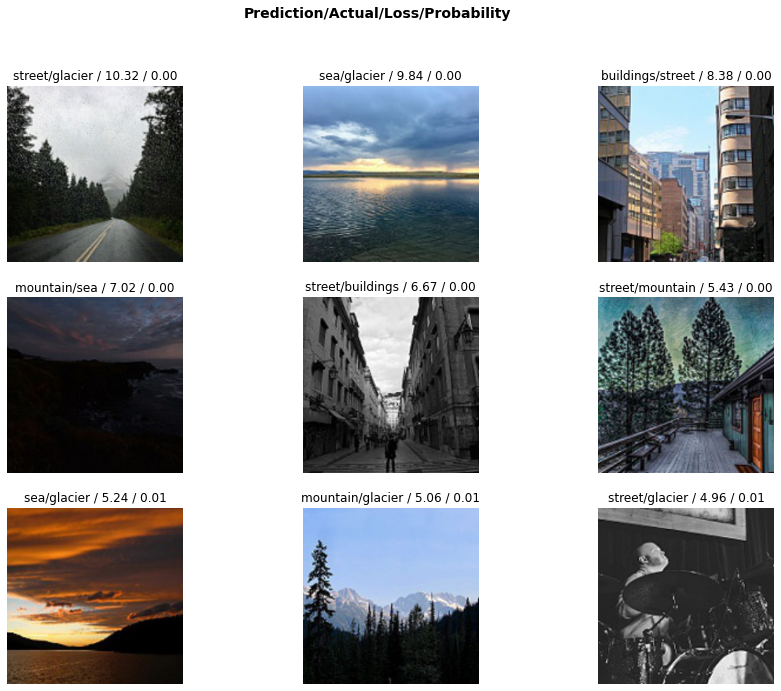

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

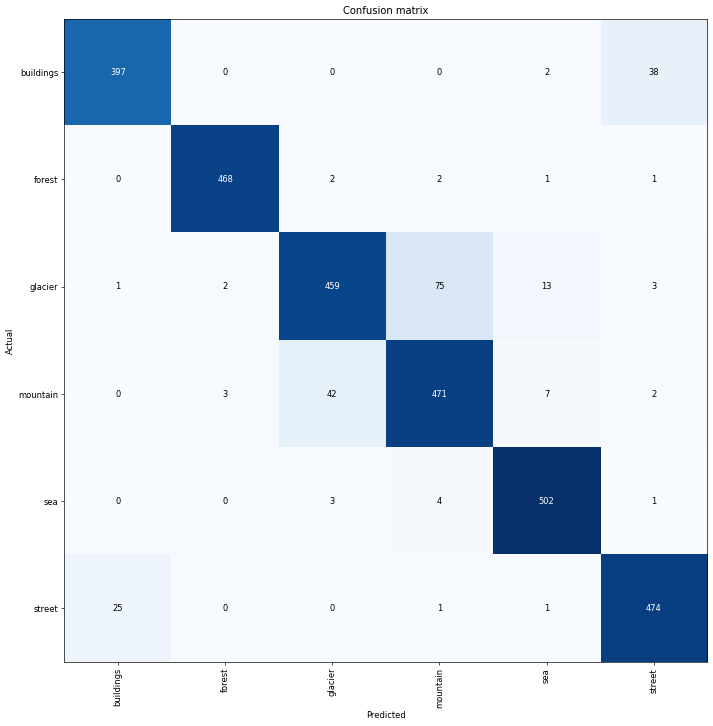

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=2)

[('glacier', 'mountain', 75),
 ('mountain', 'glacier', 42),
 ('buildings', 'street', 38),
 ('street', 'buildings', 25),
 ('glacier', 'sea', 13),
 ('mountain', 'sea', 7),
 ('sea', 'mountain', 4),
 ('glacier', 'street', 3),
 ('mountain', 'forest', 3),
 ('sea', 'glacier', 3),
 ('buildings', 'sea', 2),
 ('forest', 'glacier', 2),
 ('forest', 'mountain', 2),
 ('glacier', 'forest', 2),
 ('mountain', 'street', 2)]

Now lets use pretrained resnet50

In [17]:
data50 = ImageDataBunch.from_folder(path, train='seg_train', valid='seg_test',ds_tfms=tfms, size=300, bs=32).normalize(imagenet_stats)

In [18]:
learn50 = cnn_learner(data50, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


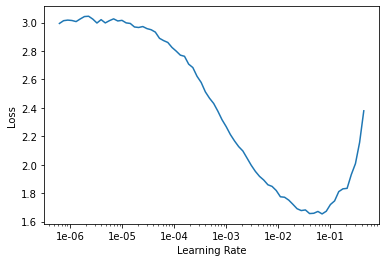

In [19]:
learn50.model_dir ="/tmp/model/"
learn50.lr_find()
learn50.recorder.plot()

In [20]:
learn50.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.457688,0.299163,0.098333,03:24
1,0.343677,0.261364,0.091667,03:19
2,0.315529,0.223059,0.079000,03:20
3,0.232903,0.187933,0.071667,03:32
4,0.185872,0.175509,0.062333,03:30
5,0.164531,0.164252,0.056000,03:27
6,0.155359,0.163991,0.058667,03:31


In [21]:
interp50 = ClassificationInterpretation.from_learner(learn50)

losses50,idxs50 = interp50.top_losses()

len(data50.valid_ds)==len(losses50)==len(idxs50)

True

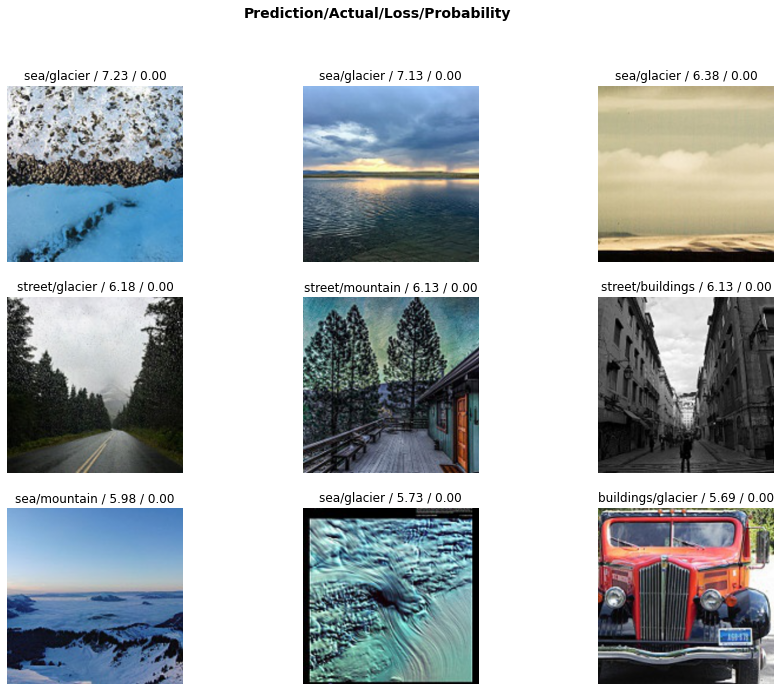

In [22]:
interp50.plot_top_losses(9, figsize=(15,11))

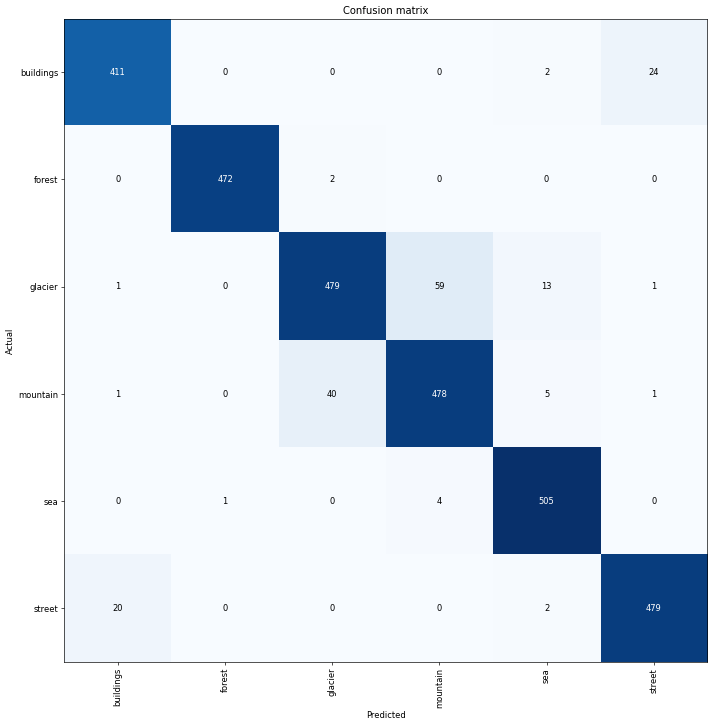

In [23]:
interp50.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interp50.most_confused(min_val=2)

[('glacier', 'mountain', 59),
 ('mountain', 'glacier', 40),
 ('buildings', 'street', 24),
 ('street', 'buildings', 20),
 ('glacier', 'sea', 13),
 ('mountain', 'sea', 5),
 ('sea', 'mountain', 4),
 ('buildings', 'sea', 2),
 ('forest', 'glacier', 2),
 ('street', 'sea', 2)]